# 画像の相互相関を見る

In [1]:
#import
import sys
import os
import glob
import math

import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

sys.path.append('../')
from pyopt import modulate as md

# 1. PRBS信号の自己相関を見る

In [2]:
N = 7  # PRBSの次数
itr = 1  # PRBSの繰り返し回数
form = 'RZ16QAM'  # 変調方式
n = 32  # 1シンボルあたりのサンプリング数[/symbol]
equalize = False  # 各シンボル数を均等にするか

bitsq = md.prbs(N=N, itr=itr)

In [3]:
correlation = [0] * len(bitsq)
for i in tqdm(range(len(bitsq))):
    xor = 0
    for j in range(len(bitsq)):
        if j + i < len(bitsq):
            xor += bitsq[j] ^ bitsq[j + i]
        else:
            xor += bitsq[j] ^ bitsq[j + i - len(bitsq)]
    if i < len(bitsq) // 2:
        correlation[len(bitsq) // 2 + i] = 1 - xor / len(bitsq)
    else:
        correlation[i - len(bitsq) // 2] = 1 - xor / len(bitsq)

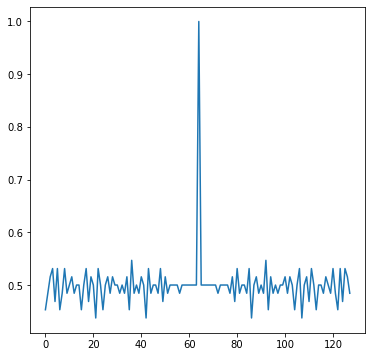

In [4]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(correlation);

# 2. 画像

In [5]:
def load_image(target_dir, image_number):
    image_dir = '../data/image/'
    image_path_list = sorted(glob.glob(os.path.join(image_dir + target_dir, '*.jpg')))
    image_path = image_path_list[image_number]
    img = Image.open(image_path)
    return img

In [13]:
def image_correlation(img_array0, img_array1):
    correlation = np.zeros((img_array0.shape[0], img_array0.shape[1]), dtype=float)
    for i in tqdm(range(img_array0.shape[0])):
        for j in range(img_array0.shape[1]):
            xor = 0
            for k in range(3):
                xor += bin(img_array0[i, j, k] ^ img_array1[i, j, k]).count('1')
            correlation[i, j] = 1 - xor / 24
    return correlation

## 2.1 画像の自己相関を見る

(768, 1024, 3)


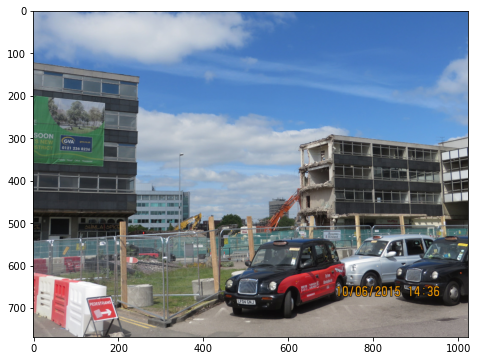

In [7]:
target_dir = 'train_0'
image_number = 3

img = load_image(target_dir, image_number)
img_array = np.array(img)
print(img_array.shape)

fig = plt.figure(figsize=(9, 6))
plt.imshow(img);

In [8]:
corr = image_correlation(img_array, img_array)
print(corr)


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


## 2.2 画像の相互相関を見る

(768, 1024, 3)
(731, 1024, 3)


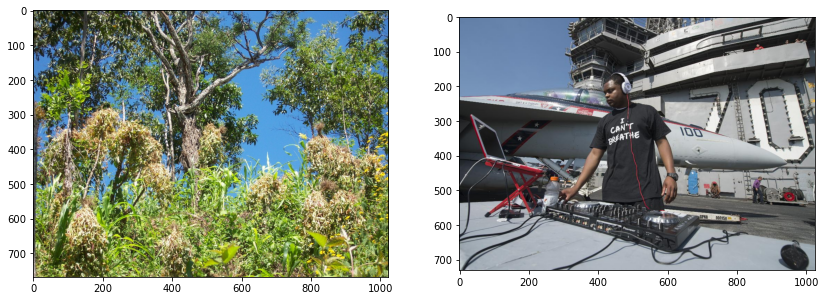

In [66]:
target_dir = 'train_0'
image_number0 = 25
image_number1 = 89

img0 = load_image(target_dir, image_number0)
img_array0 = np.array(img0)
print(img_array0.shape)
img1 = load_image(target_dir, image_number1)
img_array1 = np.array(img1)
print(img_array1.shape)

fig = plt.figure(figsize=(14, 6))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.imshow(img0)
ax1.imshow(img1);

In [67]:
corr = image_correlation(img_array0[:min(img_array0.shape[0], img_array1.shape[0]), :min(img_array0.shape[1], img_array1.shape[1])], img_array1[:min(img_array0.shape[0], img_array1.shape[0]), :min(img_array0.shape[1], img_array1.shape[1])])
print(corr)
print(np.mean(corr))


[[0.45833333 0.625      0.5        ... 0.45833333 0.375      0.375     ]
 [0.5        0.54166667 0.375      ... 0.41666667 0.33333333 0.54166667]
 [0.79166667 0.75       0.58333333 ... 0.54166667 0.54166667 0.66666667]
 ...
 [0.54166667 0.29166667 0.58333333 ... 0.58333333 0.41666667 0.375     ]
 [0.45833333 0.375      0.58333333 ... 0.375      0.5        0.29166667]
 [0.58333333 0.54166667 0.58333333 ... 0.25       0.29166667 0.41666667]]
0.501935980605905
